In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [102]:
# Loading Data
data = pd.read_csv('diabetes.csv')

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Following columns or variables have an invalid zero value

1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

### Target variable
Count of diabaties patients

In [9]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Corralation between attributes

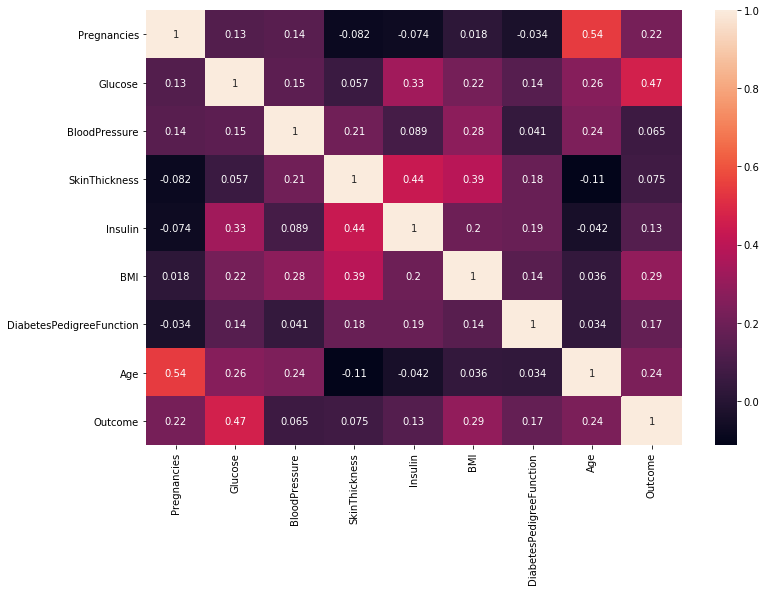

In [14]:
#Coralation plot
corr = data.corr()
plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True)
plt.show()

### Age distibution

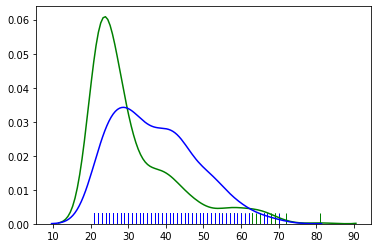

In [41]:
# Sort the dataframe by target
target_0 = data[data['Outcome'] == 0]
target_1 = data[data['Outcome'] == 1]

sns.distplot(target_0[['Age']], hist=False, rug=True, color='g')
sns.distplot(target_1[['Age']], hist=False, rug=True, color='b')

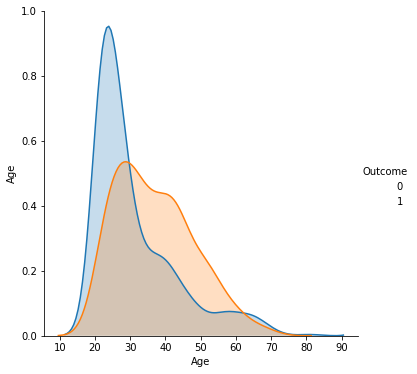

In [46]:
sns.pairplot(data[["Age", "Outcome"]], hue="Outcome", size=5)

### BMI distribution

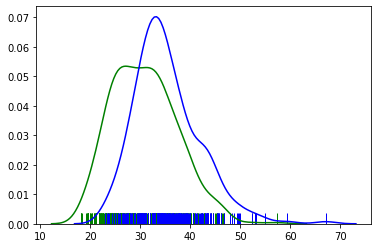

In [42]:
sns.distplot(target_0[['BMI']], hist=False, rug=True, color='g')
sns.distplot(target_1[['BMI']], hist=False, rug=True, color='b')

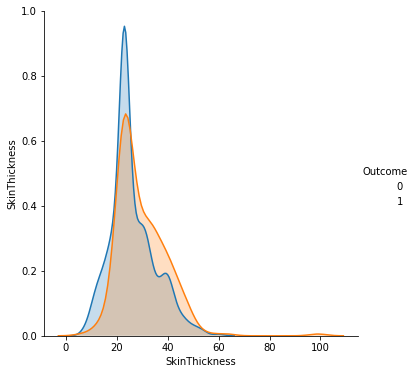

In [48]:
sns.pairplot(data[["SkinThickness", "Outcome"]], hue="Outcome", size=5)

Dataset uses the number zero to represent missing or null data. Fields with zero values

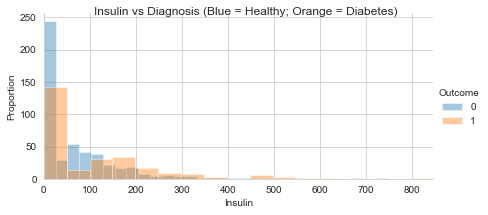

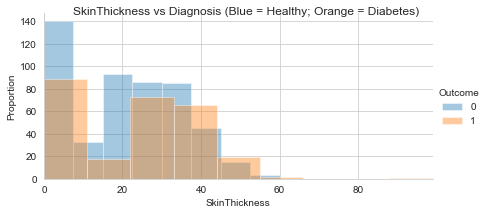

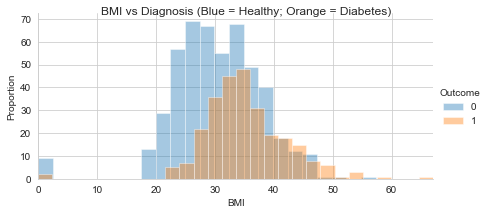

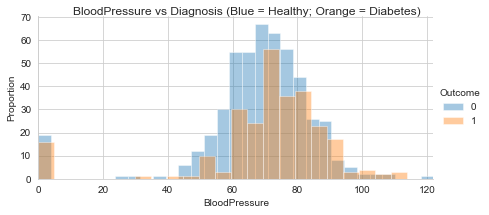

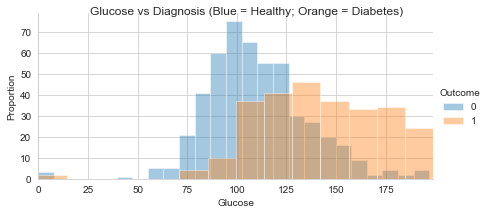

In [107]:
def plotHistogram(values,label,feature,title):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2)
    plotOne.map(sns.distplot,feature,kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.show()
plotHistogram(data,"Outcome",'Insulin','Insulin vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(data,"Outcome",'SkinThickness','SkinThickness vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(data,"Outcome",'BMI','BMI vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(data,"Outcome",'BloodPressure','BloodPressure vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(data,"Outcome",'Glucose','Glucose vs Diagnosis (Blue = Healthy; Orange = Diabetes)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202178D77C8>,
      dtype=object)

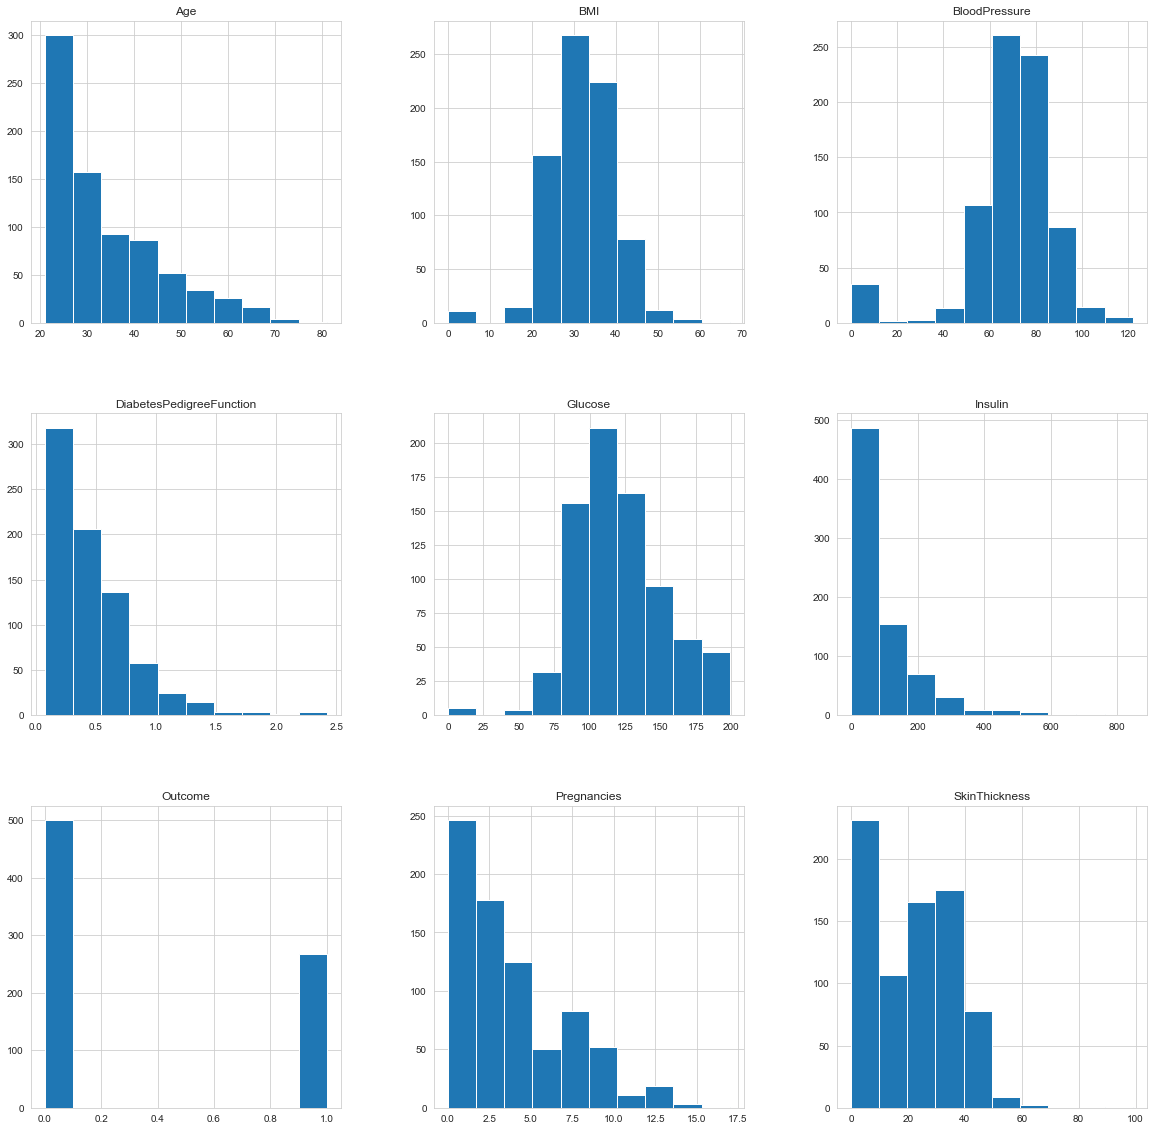

In [104]:
data.hist(figsize = (20,20))

Replace zero values with mean

In [18]:
data['Glucose'].replace(0, data['Glucose'].mean(), inplace = True)
data['BloodPressure'].replace(0, data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].replace(0, data['SkinThickness'].median(), inplace = True)
data['Insulin'].replace(0, data['Insulin'].median(), inplace = True)
data['BMI'].replace(0, data['BMI'].median(), inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202146009C8>,
      dtype=object)

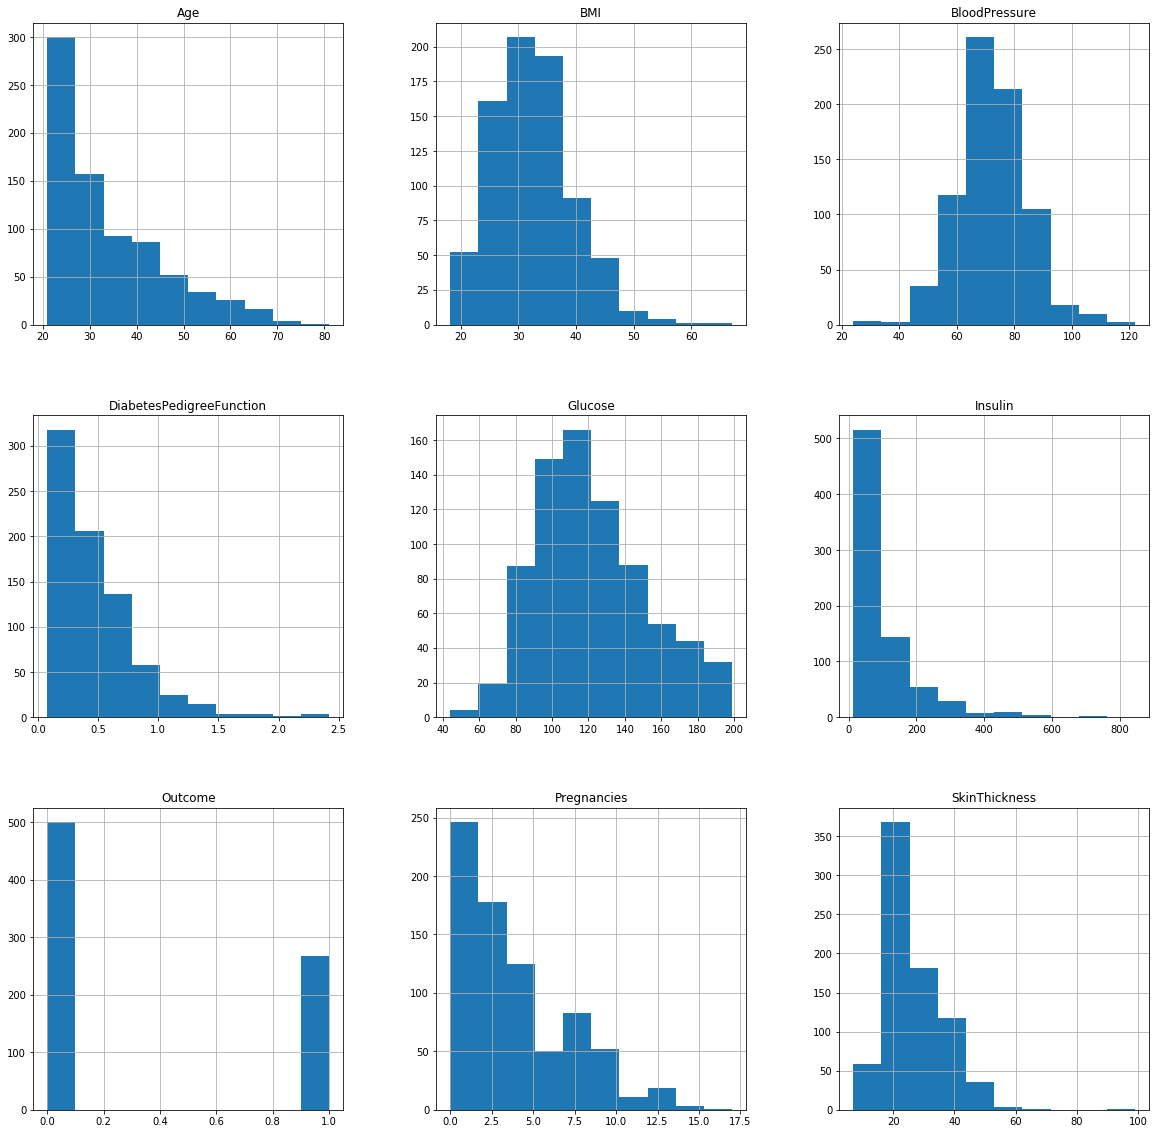

In [19]:
data.hist(figsize = (20,20))

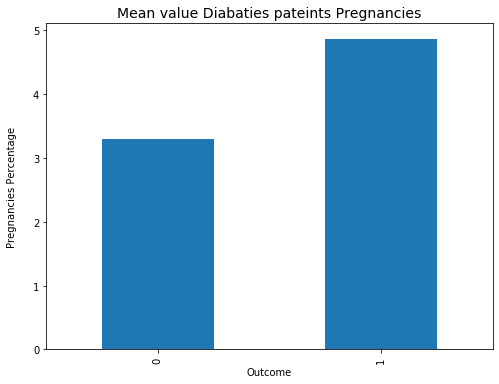

In [35]:
plt.title('Mean value Diabaties pateints Pregnancies', fontsize=14)
data.groupby('Outcome')['Pregnancies'].mean().dropna().plot(kind='bar', figsize=(8, 6))
plt.ylabel('Pregnancies Percentage\n')
plt.show()

### Scaling the data
data is rescaled such that μ = 0 and 𝛔 = 1, 

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = data.Outcome

In [24]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

### Modeling

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [87]:
models = []
scores = []

In [88]:
# model
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)
models.append('LR')
#score.append(score)
#scores.append(round(lr.score(X_test,y_test)),2)
scores.append(round(lr.score(X_test,y_test),2))

In [89]:
GBoost = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05)
GBoost.fit(X_train, y_train)
GBoost.score(X_test,y_test)
models.append('GB')
scores.append(round(GBoost.score(X_test,y_test),2))

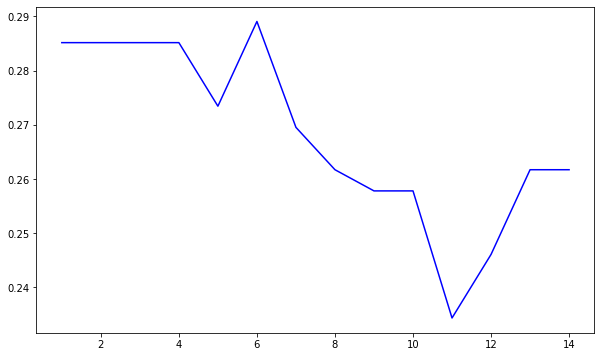

In [53]:
test_scores = []
train_scores = []
error_rate = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue')
#plt.title(‘Error Rate vs. K Value’)
#plt.xlabel(‘K’)
#plt.ylabel(‘Error Rate’)

In [90]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)
models.append('KNN')
scores.append(round(knn.score(X_test,y_test),2))

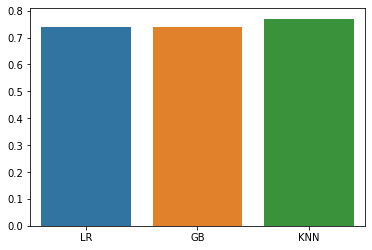

In [91]:
sns.barplot(models,scores)

In [55]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,143,24,167
1,36,53,89
All,179,77,256


In [56]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       167
           1       0.69      0.60      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



### Feature Importance

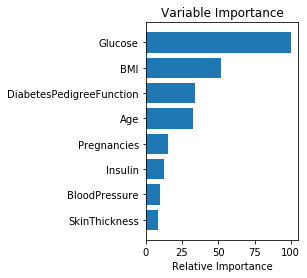

In [100]:
feature_importance = GBoost.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [96]:
df_feature_imp=data[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
df_feature_imp_name = df_feature_imp.columns

In [97]:
X =  df_feature_imp[df_feature_imp_name[0:df_feature_imp.shape[1]-1]]
Y = df_feature_imp[df_feature_imp_name[df_feature_imp.shape[1]-1]]
X_train_im, X_test_im, y_train_im, y_test_im =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_feature_imp['Outcome'])

In [99]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train_im,y_train_im)
knn.score(X_test_im,y_test_im)


0.8051948051948052